# Data Analysis Assignment — Iris Dataset

**Objective:**

- Load and analyze a dataset using pandas.
- Create visualizations using matplotlib (and seaborn for styling).

**Contents:**

1. Load and explore the Iris dataset.
2. Basic data analysis and grouping by species.
3. Visualizations: line chart, bar chart, histogram, scatter plot.
4. Findings and observations.

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Matplotlib inline for Jupyter
%matplotlib inline

# Styling
sns.set(style='whitegrid')

print('Libraries imported successfully')

Libraries imported successfully


## Task 1: Load and Explore the Dataset

We load the Iris dataset from `sklearn.datasets` and convert it to a pandas DataFrame. The dataset contains 150 samples with 4 features and a target species column.

In [2]:
try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    print('Dataset loaded. Shape:', df.shape)
except Exception as e:
    print('Error loading dataset:', e)

# Preview
df.head()

Dataset loaded. Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Dataset info
print('\nDataframe info:')
df.info()

# Missing values
print('\nMissing values by column:')
print(df.isnull().sum())


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB

Missing values by column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


### Data cleaning

If there were missing values we would handle them. For demonstration we show how to drop or fill missing values.

In [4]:
# Check for missing values and handle them (if any)
missing = df.isnull().sum().sum()
print('Total missing values in dataset:', missing)

if missing > 0:
    # Example strategies
    df_clean = df.dropna()
    print('Dropped rows with missing values. New shape:', df_clean.shape)
else:
    df_clean = df.copy()
    print('No missing values found. Proceeding with original dataframe.')

# Show the cleaned dataframe head
df_clean.head()

Total missing values in dataset: 0
No missing values found. Proceeding with original dataframe.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Task 2: Basic Data Analysis

Compute descriptive statistics and perform grouping by species.

In [5]:
# Descriptive statistics
stats = df_clean.describe()
stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Group by species and compute mean of numerical features
group_mean = df_clean.groupby('species').mean()
group_mean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Observations from grouping
- We'll briefly note any noticeable differences between species after running the notebook.

## Task 3: Data Visualization

We will create four visualizations:

1. Line chart (index vs. sepal length) — a simple trend example.
2. Bar chart — average petal length per species.
3. Histogram — distribution of sepal length.
4. Scatter plot — relationship between sepal length and sepal width.

Each plot includes titles and axis labels.

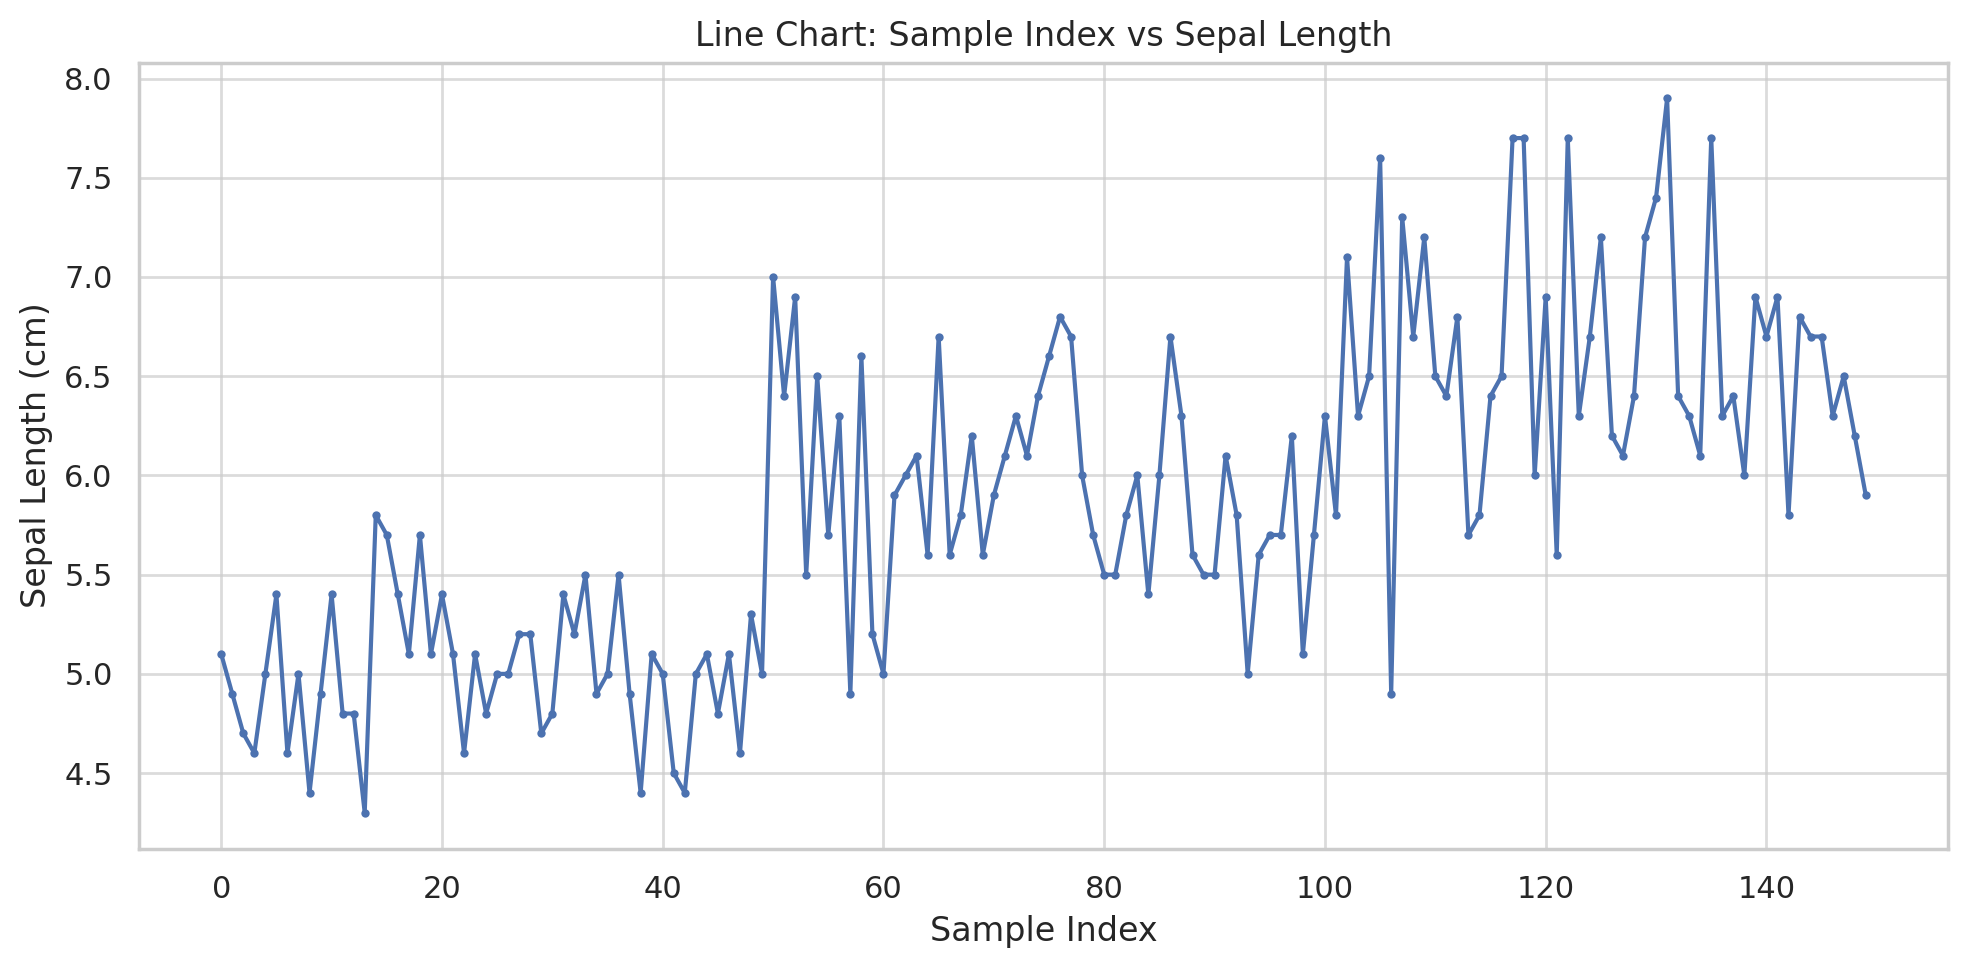

In [7]:
# 1) Line chart: sample index vs sepal length
plt.figure(figsize=(10,5))
plt.plot(df_clean.index, df_clean['sepal length (cm)'], marker='o', linestyle='-', markersize=3)
plt.title('Line Chart: Sample Index vs Sepal Length')
plt.xlabel('Sample Index')
plt.ylabel('Sepal Length (cm)')
plt.tight_layout()
plt.show()

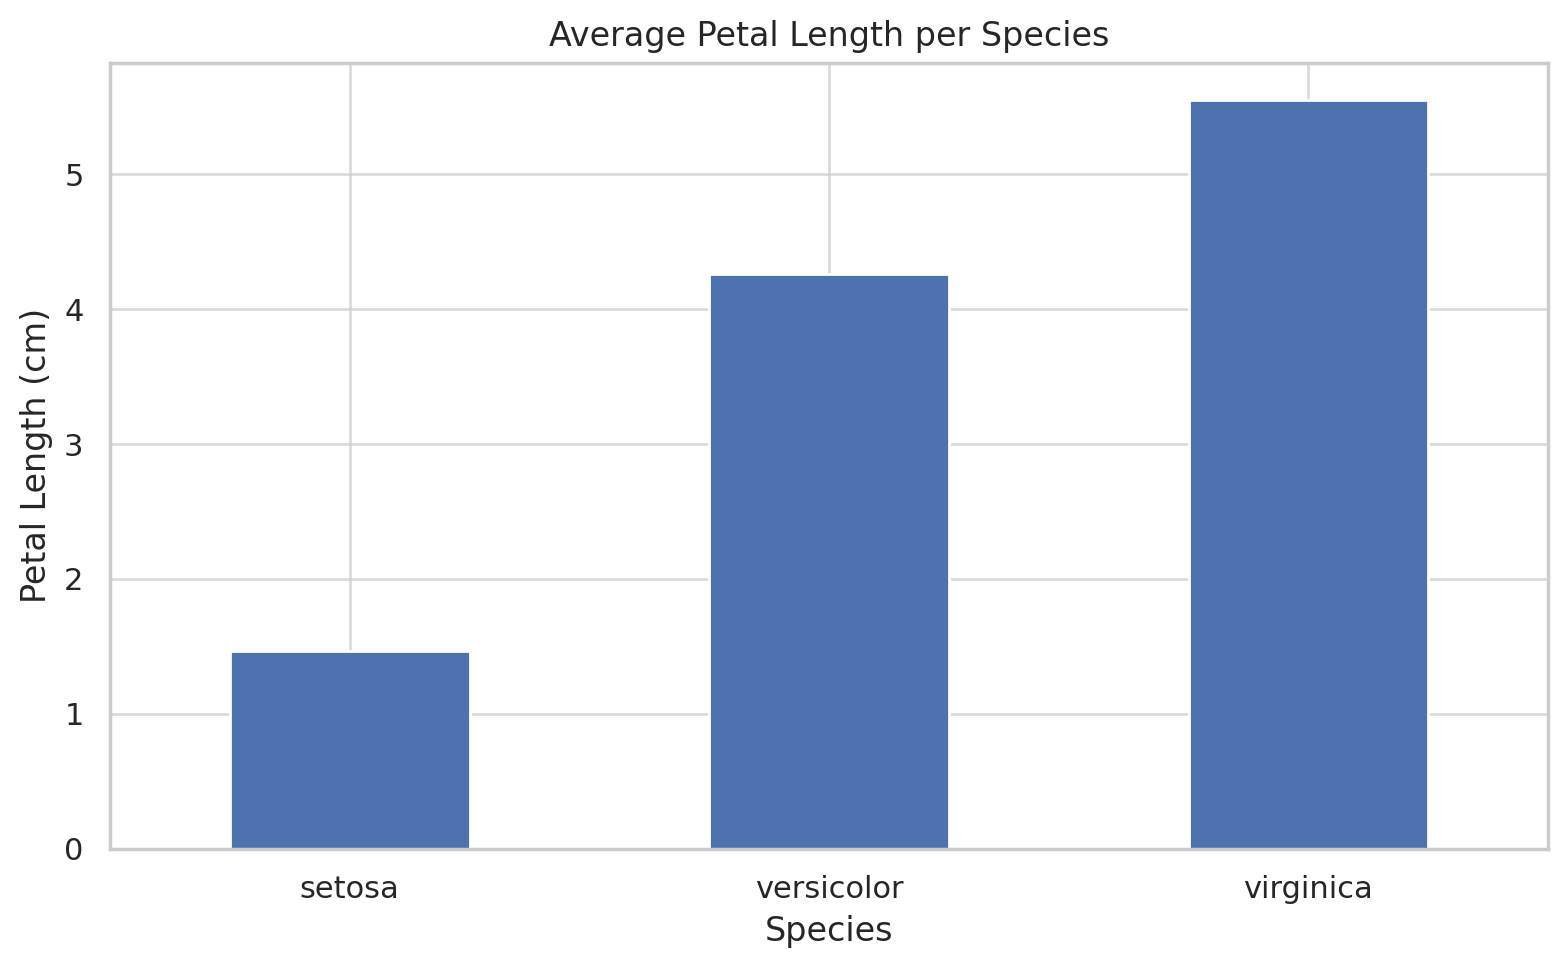

In [8]:
# 2) Bar chart: average petal length per species
plt.figure(figsize=(8,5))
group_mean['petal length (cm)'].plot(kind='bar')
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

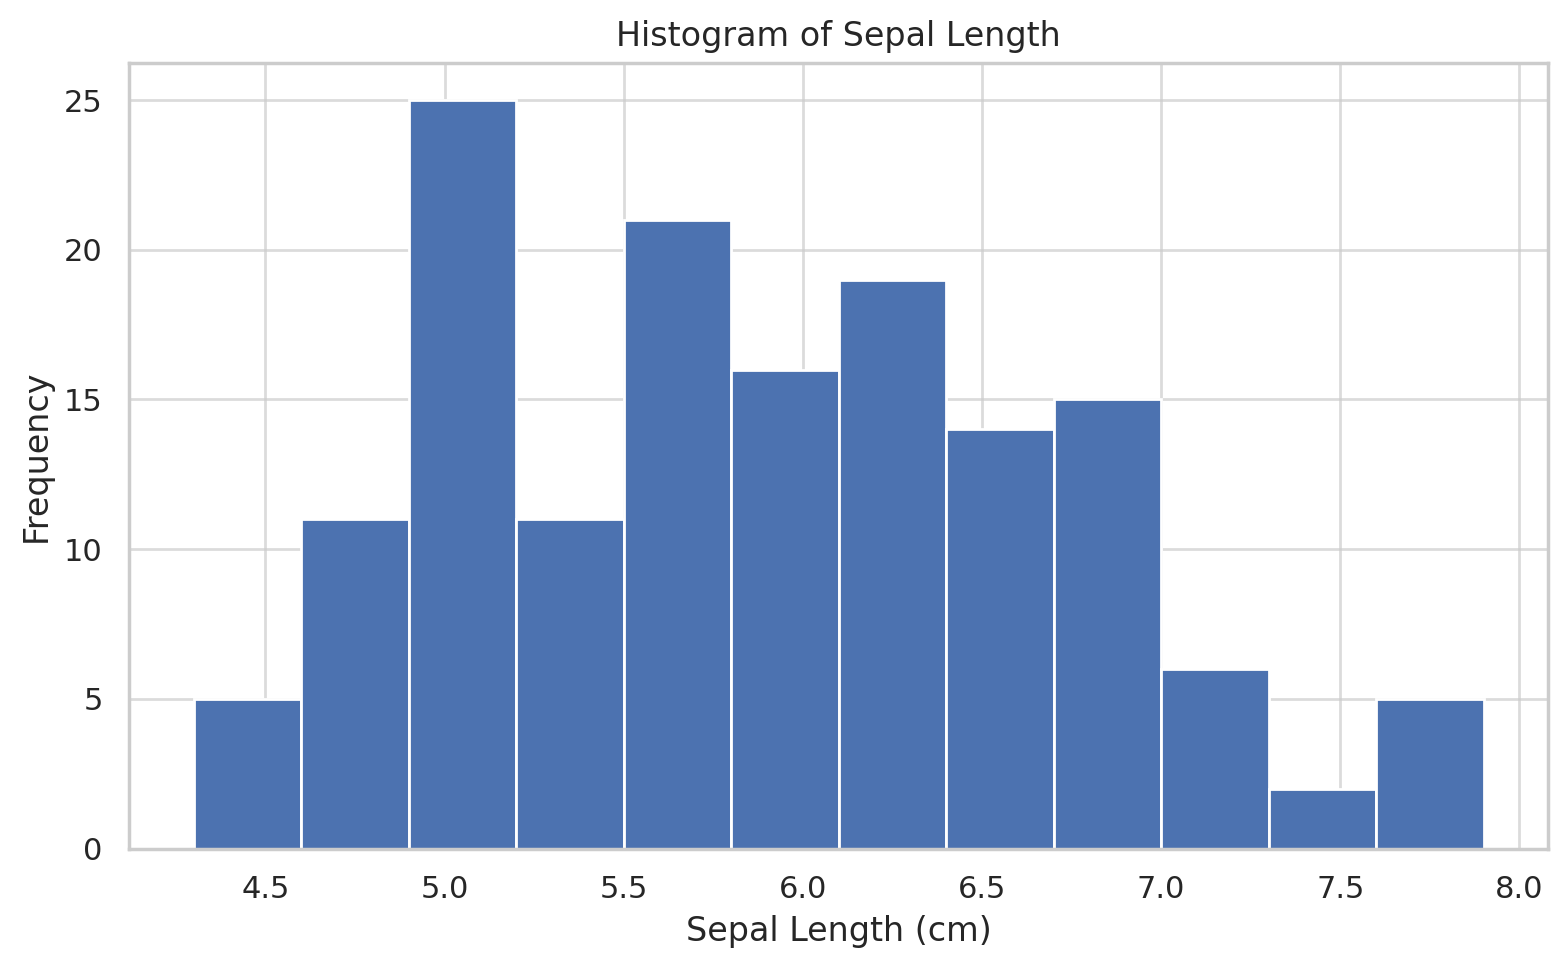

In [9]:
# 3) Histogram: distribution of sepal length
plt.figure(figsize=(8,5))
plt.hist(df_clean['sepal length (cm)'], bins=12)
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

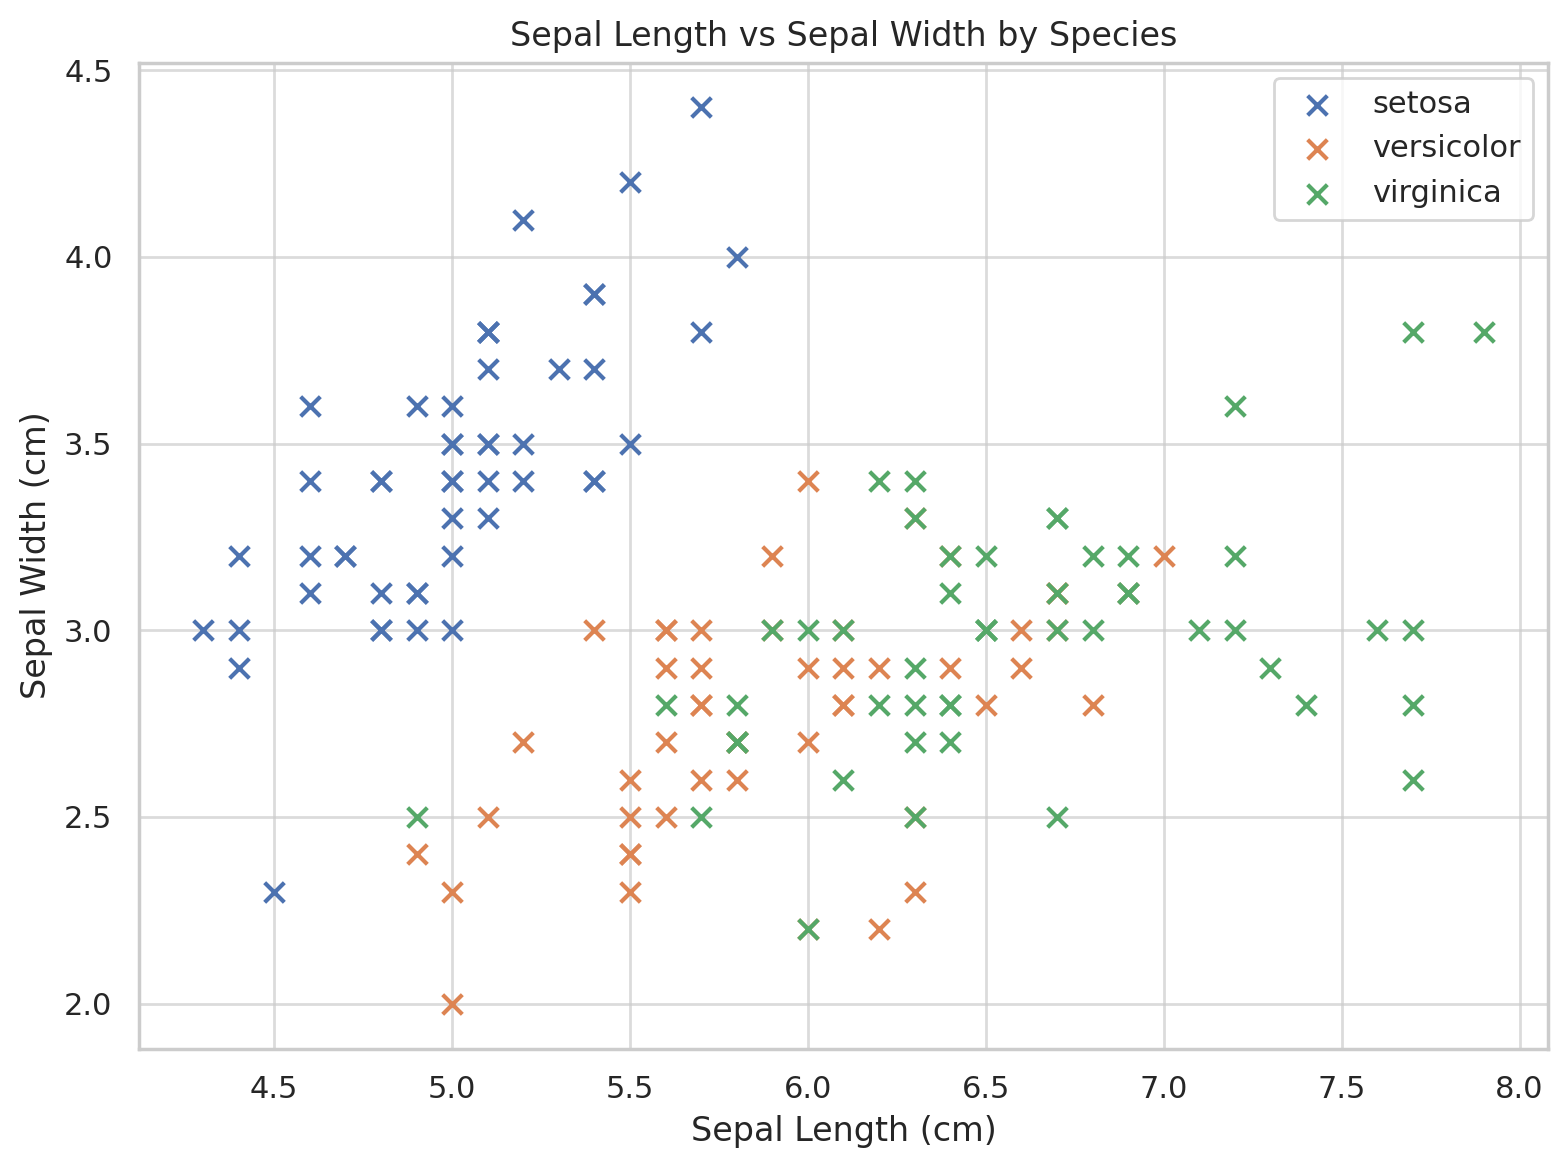

In [10]:
# 4) Scatter plot: sepal length vs sepal width (colored by species)
plt.figure(figsize=(8,6))
for species_name, group in df_clean.groupby('species'):
    plt.scatter(group['sepal length (cm)'], group['sepal width (cm)'], label=species_name, s=50)
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.tight_layout()
plt.show()

Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


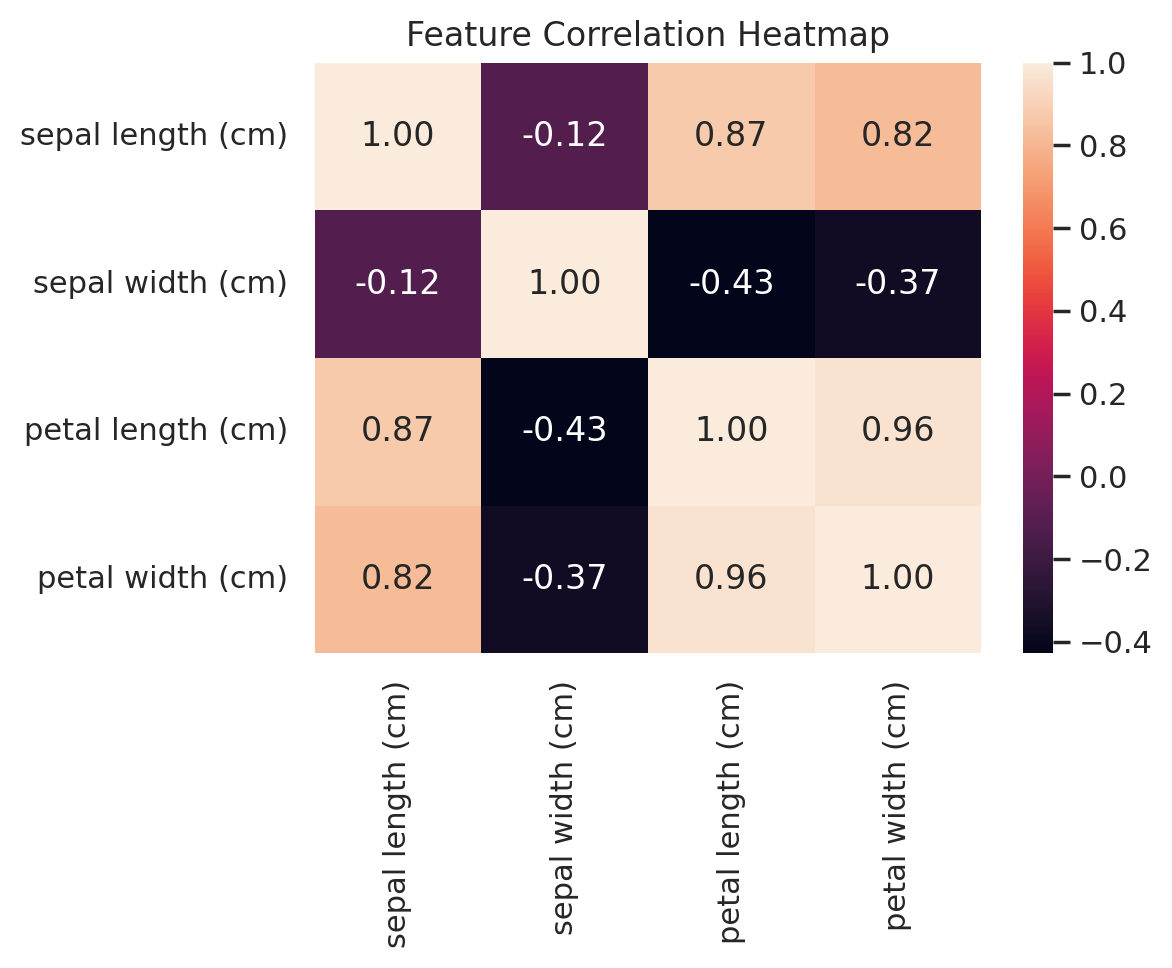

In [11]:
# Additional: correlation matrix and heatmap
corr = df_clean.drop(columns='species').corr()
print('Correlation matrix:')
print(corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## Findings & Observations

- `setosa` typically has smaller petal length and width compared to `versicolor` and `virginica`.
- There is a strong positive correlation between petal length and petal width.
- Sepal length and sepal width have a mild negative correlation.

These observations are supported by the group means and the correlation heatmap above.

## Error Handling Example

The notebook uses try/except when loading the dataset. You can also wrap file reading (for CSV) in try/except to handle `FileNotFoundError`.

In [12]:
# Example: reading a CSV with error handling
try:
    df_csv = pd.read_csv('data.csv')  # change filename if you have a CSV
    print('CSV loaded, shape:', df_csv.shape)
except FileNotFoundError:
    print('FileNotFoundError: data.csv not found. If you have a CSV dataset, place it in the same folder and update the filename.')
except Exception as e:
    print('Error reading CSV:', e)

FileNotFoundError: data.csv not found. If you have a CSV dataset, place it in the same folder and update the filename.
